In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.simplefilter("ignore")


In [37]:
# Reading csv file in to a dataframe
df = pd.read_csv("ccDefaults.csv")
print(df.head())
print(df.shape)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0         0     1  
1     

In [38]:
print(df.isnull().sum())
# drop any null values, not to interfere with complete data
df.dropna(inplace=True)
# No null values, no need for data wrangling for null values

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64


In [39]:
# Dropping id column 
df.drop("ID", axis=1, inplace=True)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0       

In [40]:
# Getting correlation to get 4 features with greatest correlation with dpnm
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["dpnm"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.21]
print(relevant_features)

PAY_1    0.324794
PAY_2    0.263551
PAY_3    0.235253
PAY_4    0.216614
dpnm     1.000000
Name: dpnm, dtype: float64


In [41]:
# Creating new dataframe with correlated variables and target feature

df_cor = df[ ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','dpnm'] ]
print(df_cor)

       PAY_1  PAY_2  PAY_3  PAY_4  dpnm
0          2      2     -1     -1     1
1         -1      2      0      0     1
2          0      0      0      0     0
3          0      0      0      0     0
4         -1      0     -1      0     0
...      ...    ...    ...    ...   ...
29995      0      0      0      0     0
29996     -1     -1     -1     -1     0
29997      4      3      2     -1     1
29998      1     -1      0      0     1
29999      0      0      0      0     1

[30000 rows x 5 columns]


In [ ]:
# Creating new dataframe with correlated variables and target feature

df_cor = df[ ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','dpnm'] ]
print(df_cor)
descriptive_features = df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']]
target_feature = df_cor['dpnm']
# Standardizing the dataframe  
df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']] = StandardScaler().fit_transform(df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']])
# df_cor
# Breaking into target and descriptive features
descriptive_features = df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']]
target_feature = df_cor[['dpnm']]

In [42]:
# Standardizing the dataframe  
df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']] = StandardScaler().fit_transform(df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']])
df_cor

,PAY_1,PAY_2,PAY_3,PAY_4,dpnm
0,1.794564,1.782348,-0.696663,-0.666599,1
1,-0.874991,1.782348,0.138865,0.188746,1
2,0.014861,0.111736,0.138865,0.188746,0
3,0.014861,0.111736,0.138865,0.188746,0
4,-0.874991,0.111736,-0.696663,0.188746,0
...,...,...,...,...,...
29995,0.014861,0.111736,0.138865,0.188746,0
29996,-0.874991,-0.723570,-0.696663,-0.666599,0
29997,3.574267,2.617654,1.809921,-0.666599,1
29998,0.904712,-0.723570,0.138865,0.188746,1


In [48]:
# Breaking into target and descriptive features
descriptive_features = df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']]
target_feature = df_cor[['dpnm']]


In [49]:
# partition dataset into 70-30

# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.3,random_state = 2021)

In [62]:
# partition dataset into 70-30

# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.3,random_state = 2021)
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2021)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
# Accuracy of test set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
# accuracy of train set
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
# Confusion matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)
plt.figure(figsize=(16,12))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

Model accuracy score with criterion entropy: 0.8248


In [60]:
# accuracy of train set
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8181


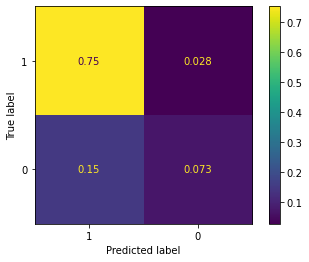

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_en, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
cmd.plot()

In [63]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[6767  253]
 [1324  656]]


[Text(0.5, 0.875, 'X[0] <= 0.46\nentropy = 0.763\nsamples = 21000\nvalue = [16344, 4656]'),
 Text(0.25, 0.625, 'X[2] <= 0.974\nentropy = 0.584\nsamples = 16259\nvalue = [13986, 2273]'),
 Text(0.125, 0.375, 'X[1] <= 0.947\nentropy = 0.557\nsamples = 15311\nvalue = [13322, 1989]'),
 Text(0.0625, 0.125, 'entropy = 0.55\nsamples = 15130\nvalue = [13205, 1925]'),
 Text(0.1875, 0.125, 'entropy = 0.937\nsamples = 181\nvalue = [117, 64]'),
 Text(0.375, 0.375, 'X[3] <= 1.044\nentropy = 0.881\nsamples = 948\nvalue = [664, 284]'),
 Text(0.3125, 0.125, 'entropy = 0.821\nsamples = 613\nvalue = [456, 157]'),
 Text(0.4375, 0.125, 'entropy = 0.957\nsamples = 335\nvalue = [208, 127]'),
 Text(0.75, 0.625, 'X[0] <= 1.35\nentropy = 1.0\nsamples = 4741\nvalue = [2358, 2383]'),
 Text(0.625, 0.375, 'X[1] <= 1.365\nentropy = 0.93\nsamples = 2576\nvalue = [1685, 891]'),
 Text(0.5625, 0.125, 'entropy = 0.821\nsamples = 1302\nvalue = [968, 334]'),
 Text(0.6875, 0.125, 'entropy = 0.989\nsamples = 1274\nvalue = [7

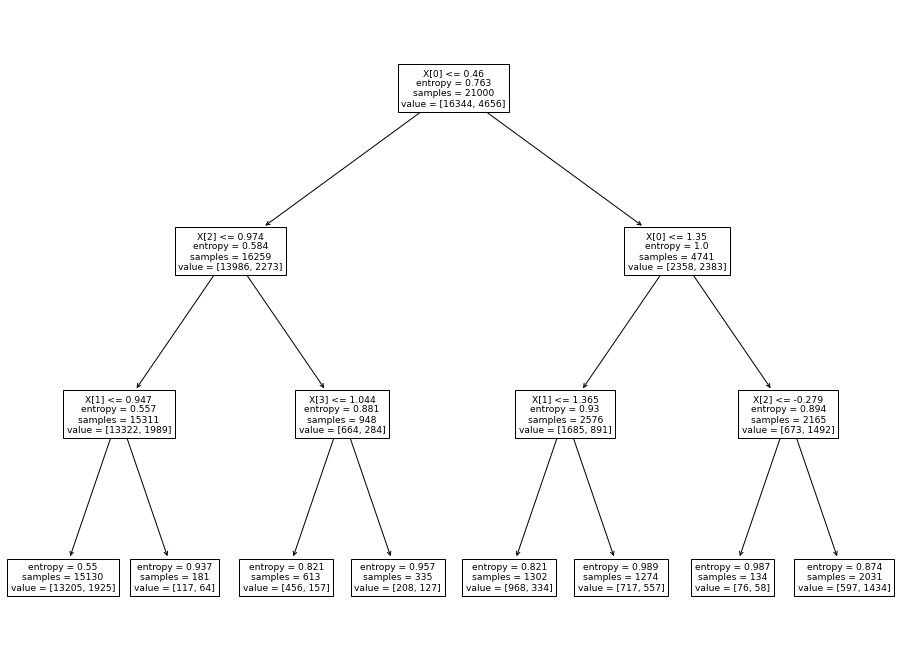

In [66]:
plt.figure(figsize=(16,12))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0       

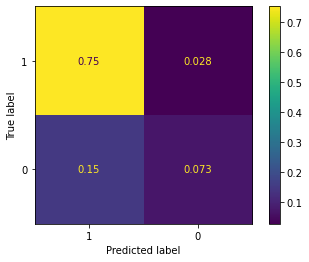

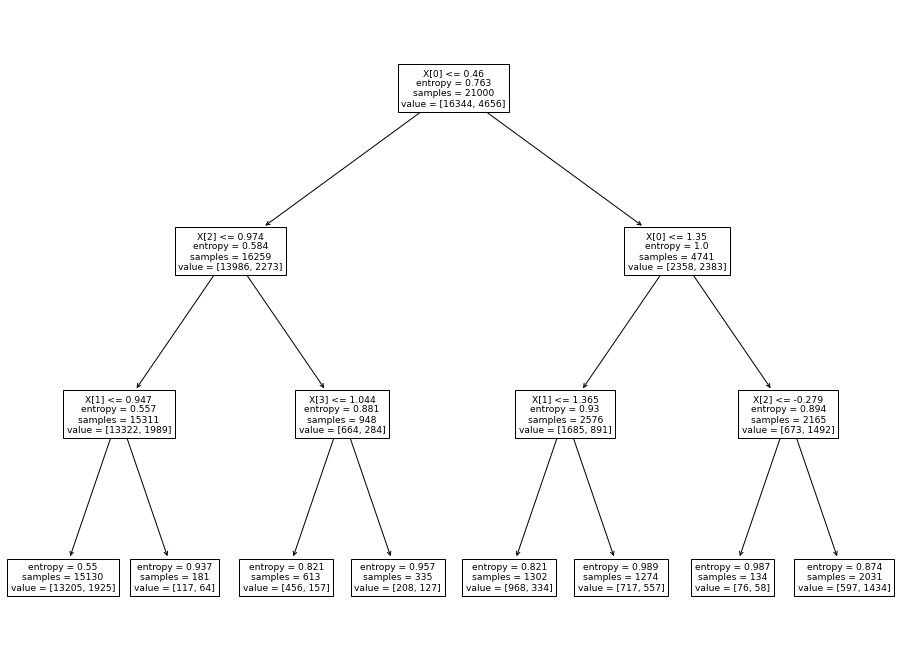

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.simplefilter("ignore")

# FIRST PART
# CODE WILL NOT RUN. THIS IS JUST FOR REFERENCE

def main():
    # Reading csv file in to a dataframe
    df = pd.read_csv("ccDefaults.csv")
    #print(df.head())
    #print(df.shape)

    # print(df.isnull().sum())
    # drop any null values, not to interfere with complete data
    df.dropna(inplace=True)
    # No null values, no need for data wrangling for null values

    # Dropping id column 
    df.drop("ID", axis=1, inplace=True)
    print(df.head())

    # Getting correlation to get 4 features with greatest correlation with dpnm
    cor = df.corr()

    #Correlation with output variable
    cor_target = abs(cor["dpnm"])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.21]
    print(relevant_features)

    # Creating new dataframe with correlated variables and target feature

    df_cor = df[ ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','dpnm'] ]
    print(df_cor)
    descriptive_features = df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']]
    target_feature = df_cor['dpnm']
    # Standardizing the dataframe  
    df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']] = StandardScaler().fit_transform(df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']])
    # df_cor
    # Breaking into target and descriptive features
    descriptive_features = df_cor[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4']]
    target_feature = df_cor[['dpnm']]

    # partition dataset into 70-30

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.3,random_state = 2021)
    clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2021)
    # fit the model
    clf_en.fit(X_train, y_train)
    y_pred_en = clf_en.predict(X_test)
    # Accuracy of test set
    print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
    # accuracy of train set
    y_pred_train_en = clf_en.predict(X_train)
    #y_pred_train_en
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_en, normalize='all')
    cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
    cmd.plot()
    # plotting tree
    plt.figure(figsize=(16,12))
    tree.plot_tree(clf_en.fit(X_train, y_train)) 


if __name__ == '__main__':
    main()
